# Data Loading

In [1]:
import pandas as pd

In [20]:
train_data_df = pd.read_csv('../train.csv')

# get the sequence
seq = open('../sequence.fasta', 'r').read()
seq = seq.split("\n")[1]

# create each mutated sequence using the info
sequences = []
for i in df['mutant']:
    ind = int(i[1:-1])
    tmp = seq[:ind] + i[-1] + seq[ind+1:]
    sequences.append(tmp)
train_data_df['Sequence'] = sequences

In [22]:
train_data_df = train_data_df.rename(columns={'DMS_score': 'labels'})

train_data_df.head()

,mutant,labels,Sequence
0,M0Y,0.2730,YVNEARGNSSLNPCLEGSASSGSESSKDSSRCSTPGLDPERHERLR...
1,M0W,0.2857,WVNEARGNSSLNPCLEGSASSGSESSKDSSRCSTPGLDPERHERLR...
2,M0V,0.2153,VVNEARGNSSLNPCLEGSASSGSESSKDSSRCSTPGLDPERHERLR...
3,M0T,0.3122,TVNEARGNSSLNPCLEGSASSGSESSKDSSRCSTPGLDPERHERLR...
4,M0S,0.2180,SVNEARGNSSLNPCLEGSASSGSESSKDSSRCSTPGLDPERHERLR...


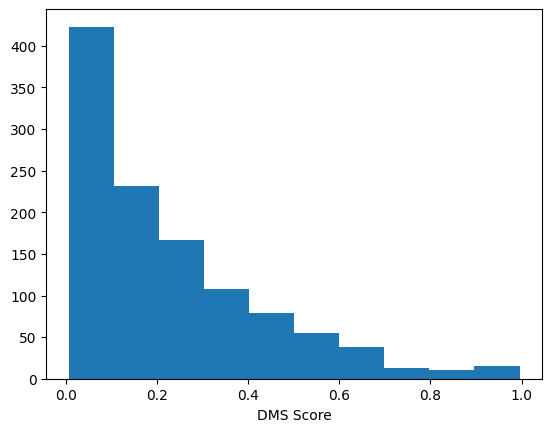

In [12]:
import matplotlib.pyplot as plt

plt.hist(train_data["labels"])
plt.xlabel("DMS Score")
plt.show()

# Utils

In [13]:
def compute_metrics(p):
    """Compute Pearson correlation for evaluation."""
    predictions, labels = p
    
    # Flatten in case of multi-dimensional outputs
    predictions = predictions.flatten()
    labels = labels.flatten()
    
    # Compute Pearson correlation
    pearson_corr, _ = pearsonr(predictions, labels)
    
    return {'pearson_correlation': pearson_corr}

In [14]:
def compute_loss(model, inputs):
    """Custom compute_loss function for regression."""
    logits = model(**inputs).logits.view(-1)  # Flatten logits
    labels = inputs["labels"].view(-1)  # Flatten labels
    loss_fct = nn.MSELoss()  # Mean Squared Error Loss
    loss = loss_fct(logits, labels)
    return loss

In [26]:
from datasets import Dataset

train_data = Dataset.from_pandas(train_data_df)


# Data Processing

In [42]:
from datasets import Dataset
from transformers import AutoTokenizer

# Assuming you have the DataFrame `train_data_df`
# Tokenization
tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t12_35M_UR50D")

# Max sequence length (for example, you can set it based on your sequences' length)
max_sequence_length = 512  # Adjust this based on your data or preference

# Tokenizing the sequences
train_data_tokenized = tokenizer(
    train_data_df["Sequence"].to_list(),
    max_length=max_sequence_length,
    return_tensors="pt",  # Returns PyTorch tensors
    padding=True,         # Pads the sequences to max length
    truncation=True       # Truncates if the length exceeds max_sequence_length
)

# Convert the DataFrame to a Hugging Face Dataset and add the 'labels' column
train_data_hf = Dataset.from_pandas(train_data_df)

# Add tokenized sequences to the dataset (the tokenized outputs)
train_data_hf = train_data_hf.add_column("input_ids", train_data_tokenized["input_ids"])
train_data_hf = train_data_hf.add_column("attention_mask", train_data_tokenized["attention_mask"])

# Rename the column `DMS_score` to `labels`
train_data_hf = train_data_hf.map(lambda x: {'labels': x['labels']})

# Now you have the Hugging Face Dataset with the tokenized sequence and labels
print(train_data_hf)


ArrowInvalid: Could not convert tensor([ 0, 19,  7, 17,  9,  5, 10,  6, 17,  8,  8,  4, 17, 14, 23,  4,  9,  6,
         8,  5,  8,  8,  6,  8,  9,  8,  8, 15, 13,  8,  8, 10, 23,  8, 11, 14,
         6,  4, 13, 14,  9, 10, 21,  9, 10,  4, 10,  9, 15, 20, 10, 10, 10,  4,
         9,  8,  6, 13, 15, 22, 18,  8,  4,  9, 18, 18, 14, 14, 10, 11,  5,  9,
         6,  5,  7, 17,  4, 12,  8, 10, 18, 13, 10, 20,  5,  5,  6,  6, 14,  4,
        19, 12, 13,  7, 11, 22, 21, 14,  5,  6, 13, 14,  6,  8, 13, 15,  9, 11,
         8,  8, 20, 20, 12,  5,  8, 11,  5,  7, 17, 19, 23,  6,  4,  9, 11, 12,
         4, 21, 20, 11, 23, 23, 10, 16, 10,  4,  9,  9, 12, 11,  6, 21,  4, 21,
        15,  5, 15, 16,  4,  6,  4, 15, 17, 12, 20,  5,  4, 10,  6, 13, 14, 12,
         6, 13, 16, 22,  9,  9,  9,  9,  6,  6, 18, 17, 19,  5,  7, 13,  4,  7,
        15, 21, 12, 10,  8,  9, 18,  6, 13, 19, 18, 13, 12, 23,  7,  5,  6, 19,
        14, 15,  6, 21, 14,  9,  5,  6,  8, 18,  9,  5, 13,  4, 15, 21,  4, 15,
         9, 15,  7,  8,  5,  6,  5, 13, 18, 12, 12, 11, 16,  4, 18, 18,  9,  5,
        13, 11, 18, 18, 10, 18,  7, 15,  5, 23, 11, 13, 20,  6, 12, 11, 23, 14,
        12,  7, 14,  6, 12, 18, 14, 12, 16,  6, 19, 21,  8,  4, 10, 16,  4,  7,
        15,  4,  8, 15,  4,  9,  7, 14, 16,  9, 12, 15, 13,  7, 12,  9, 14, 12,
        15, 13, 17, 13,  5,  5, 12, 10, 17, 19,  6, 12,  9,  4,  5,  7,  8,  4,
        23, 16,  9,  4,  4,  5,  8,  6,  4,  7, 14,  6,  4, 21, 18, 19, 11,  4,
        17, 10,  9, 20,  5, 11, 11,  9,  7,  4, 15, 10,  4,  6, 20, 22, 11,  9,
        13, 14, 10, 10, 14,  4, 14, 22,  5,  4,  8,  5, 21, 14, 15, 10, 10,  9,
         9, 13,  7, 10, 14, 12, 18, 22,  5,  8, 10, 14, 15,  8, 19, 12, 19, 10,
        11, 16,  9, 22, 13,  9, 18, 14, 17,  6, 10, 22,  6, 17,  8,  8,  8, 14,
         5, 18,  6,  9,  4, 15, 13, 19, 19,  4, 18, 19,  4, 15,  8, 15,  8, 14,
        15,  9,  9,  4,  4, 15, 20, 22,  6,  9,  9,  4, 11,  8,  9,  9,  8,  7,
        18,  9,  7, 18,  7,  4, 19,  4,  8,  6,  9, 14, 17, 10, 17,  6, 21, 15,
         7, 11, 23,  4, 14, 22, 17, 13,  9, 14,  4,  5,  5,  9, 11,  8,  4,  4,
        15,  9,  9,  4,  4, 10,  7, 17, 10, 16,  6, 12,  4, 11, 12, 17,  8, 16,
        14, 17, 12, 17,  6, 15, 14,  8,  8, 13, 14, 12,  7,  6, 22,  6, 14,  8,
         6,  6, 19,  7, 18, 16, 15,  2]) with type Tensor: did not recognize Python value type when inferring an Arrow data type

In [40]:
train_data_tokenized

{'input_ids': tensor([[ 0, 19,  7,  ..., 11,  9,  2],
        [ 0, 22,  7,  ..., 11,  9,  2],
        [ 0,  7,  7,  ..., 11,  9,  2],
        ...,
        [ 0, 20,  7,  ..., 11,  9,  2],
        [ 0, 20,  7,  ..., 11,  9,  2],
        [ 0, 20,  7,  ..., 11,  9,  2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}

In [41]:
for col in train_data_tokenized.keys():
    train_data_df[col] = train_data_tokenized[col]

train_data_df

ValueError: Expected a 1D array, got an array with shape (1140, 656)

In [ ]:
train_data = train_data.train_test_split(test_size=0.2)
train_ds = train_data["train"]
eval_ds = train_data["test"]
print(len(train_ds), len(eval_ds))

# Eval